In [2]:
import sys
sys.path.insert(0, '/media/datta/Sri Datta/_KTH_ACADEMIA/ML/dectrees/python')

In [3]:
import monkdata as m
import dtree
import pandas as pd
import drawtree_qt5 as dt5
import matplotlib.pyplot as plt
import numpy as np

In [4]:
entropy = {'dataset':['monk1', 'monk2', 'monk3'], 'entropy':[dtree.entropy(m.monk1), dtree.entropy(m.monk2), dtree.entropy(m.monk3)]}
df_entropy = pd.DataFrame(entropy)
df_entropy

,dataset,entropy
0,monk1,1.000000
1,monk2,0.957117
2,monk3,0.999806


In [5]:
average_gain = {'dataset':['monk1', 'monk2', 'monk3'], 
                'a1':[dtree.averageGain(m.monk1, m.attributes[0]), dtree.averageGain(m.monk2, m.attributes[0]), dtree.averageGain(m.monk3, m.attributes[0])],
                'a2':[dtree.averageGain(m.monk1, m.attributes[1]), dtree.averageGain(m.monk2, m.attributes[1]), dtree.averageGain(m.monk3, m.attributes[1])],
                'a3':[dtree.averageGain(m.monk1, m.attributes[2]), dtree.averageGain(m.monk2, m.attributes[2]), dtree.averageGain(m.monk3, m.attributes[2])],
                'a4':[dtree.averageGain(m.monk1, m.attributes[3]), dtree.averageGain(m.monk2, m.attributes[3]), dtree.averageGain(m.monk3, m.attributes[3])],
                'a5':[dtree.averageGain(m.monk1, m.attributes[4]), dtree.averageGain(m.monk2, m.attributes[4]), dtree.averageGain(m.monk3, m.attributes[4])],
                'a6':[dtree.averageGain(m.monk1, m.attributes[5]), dtree.averageGain(m.monk2, m.attributes[5]), dtree.averageGain(m.monk3, m.attributes[5])]}
df_average_gain = pd.DataFrame(average_gain)
df_average_gain

,a1,a2,a3,a4,a5,a6,dataset
0,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758,monk1
1,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248,monk2
2,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077,monk3


In [6]:
monk1 = m.monk1
bestatt = dtree.bestAttribute(monk1, m.attributes)
for value in bestatt.values:
    temp = dtree.select(monk1, m.attributes[4], value)
    print("######## Subset A5 = " + str(value) + " ##########")
    if(dtree.allNegative(temp) | dtree.allPositive(temp)):
        print("Pure Node")
    else:
        remainAttributes = [x for x in m.attributes if x != bestatt]
        for att in remainAttributes:
            x = dtree.averageGain(temp, att)
            print("Information Gain on " + str(att) + " : " + str(x))

######## Subset A5 = 1 ##########
Pure Node
######## Subset A5 = 2 ##########
Information Gain on A1 : 0.0402168416094
Information Gain on A2 : 0.0150634750722
Information Gain on A3 : 0.0372726273602
Information Gain on A4 : 0.0488922026295
Information Gain on A6 : 0.0258072847239
######## Subset A5 = 3 ##########
Information Gain on A1 : 0.0330551001346
Information Gain on A2 : 0.0021971835391
Information Gain on A3 : 0.0179822938423
Information Gain on A4 : 0.0191227551775
Information Gain on A6 : 0.0451085378248
######## Subset A5 = 4 ##########
Information Gain on A1 : 0.206290746415
Information Gain on A2 : 0.0338983950776
Information Gain on A3 : 0.025906145435
Information Gain on A4 : 0.0759329084415
Information Gain on A6 : 0.00332396296316


In [7]:
monk1 = m.monk1
bestatt = dtree.bestAttribute(monk1, m.attributes)
for value in bestatt.values:
    temp = dtree.select(monk1, bestatt, value)
    print("######## Subset A5 = " + str(value) + " ##########")
    if(dtree.allNegative(temp) | dtree.allPositive(temp)):
        print(dtree.mostCommon(temp))
    else:
        remainAttributes = [x for x in m.attributes if x != bestatt]
        bestatt2 = dtree.bestAttribute(temp, remainAttributes)
        print("Split by : " + str(bestatt2))
        for val in bestatt2.values:
            temp2 = dtree.select(temp, bestatt2, val)
            print("********** Subset = " + str(val) + " ***********")
            print(dtree.mostCommon(temp2))

######## Subset A5 = 1 ##########
True
######## Subset A5 = 2 ##########
Split by : A4
********** Subset = 1 ***********
False
********** Subset = 2 ***********
False
********** Subset = 3 ***********
False
######## Subset A5 = 3 ##########
Split by : A6
********** Subset = 1 ***********
False
********** Subset = 2 ***********
False
######## Subset A5 = 4 ##########
Split by : A1
********** Subset = 1 ***********
False
********** Subset = 2 ***********
False
********** Subset = 3 ***********
True


### Assignment 5 

In [8]:
monk1 = [m.monk1, m.monk1test]
monk2 = [m.monk2, m.monk2test]
monk3 = [m.monk3, m.monk3test]
dataset_list = [monk1, monk2, monk3]
for i in range(0,len(dataset_list)):
    print("Dataset Monk-" + str(i+1))
    t=dtree.buildTree(dataset_list[i][0], m.attributes)
    print("Training Error : " + str(1 - dtree.check(t, dataset_list[i][0])))
    print("Test Error : " + str(1-dtree.check(t, dataset_list[i][1])))

Dataset Monk-1
Training Error : 0.0
Test Error : 0.171296296296
Dataset Monk-2
Training Error : 0.0
Test Error : 0.30787037037
Dataset Monk-3
Training Error : 0.0
Test Error : 0.0555555555556


### Assignment 7

In [9]:
def prune(tree, validation):
    resultTree = tree
    resultAcc = dtree.check(resultTree, validation)
    alternatives = dtree.allPruned(resultTree)
    #print("mashook pak eko")
    for alternative in alternatives:
        tempTree = alternative
        tempAcc = dtree.check(tempTree, validation)
        if(tempAcc > resultAcc):
            resultTree = tempTree
            resultAcc = tempAcc
            
    if(resultTree == tree):
        return resultTree

    return prune(resultTree, validation)

In [10]:
import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]



In [11]:
def assignment7(dataset, fractions):
    errorInitial = []
    errorPruned = []
    meanErrorInitial = []
    meanErrorPruned = []
    varianceErrorInitial = []
    varianceErrorPruned = []

    for fraction in fractions:
        for i in range(0,250):
            monktrain, monkval = partition(dataset, fraction)
            initialTree = dtree.buildTree(monktrain, m.attributes)
            prunedTree = prune(initialTree, monkval)
            errorInitial.append(1-dtree.check(initialTree, m.monk1test))
            errorPruned.append(1-dtree.check(prunedTree, m.monk1test))

        meanErrorInitial.append(np.mean(errorInitial))
        meanErrorPruned.append(np.mean(errorPruned))
        varianceErrorInitial.append(np.var(errorInitial))
        varianceErrorPruned.append(np.var(errorPruned))
    
    plot_result(meanErrorInitial, meanErrorPruned, varianceErrorInitial, varianceErrorPruned)

In [12]:
def plot_result(meanErrorInitial, meanErrorPruned, varianceErrorInitial, varianceErrorPruned):
    fig, ax =plt.subplots(1,2, figsize=(20,10))
    fig.subplots_adjust(wspace=.25)
    ax[0].set_title('Mean Error')
    ax[1].set_title('Variance')

    df = pd.DataFrame(np.c_[meanErrorInitial,meanErrorPruned], index=fractions).reset_index()
    df.columns = ['Fraction','Initial', 'Pruned']
    df = pd.melt(df, id_vars="Fraction", var_name="Tree", value_name="Mean Error")
    seaborn.factorplot(x='Fraction', y='Mean Error', hue='Tree', data=df, kind='bar', ax=ax[0])

    df = pd.DataFrame(np.c_[varianceErrorInitial,varianceErrorPruned], index=fractions).reset_index()
    df.columns = ['Fraction','Initial', 'Pruned']
    df = pd.melt(df, id_vars="Fraction", var_name="Tree", value_name="Variance Error")
    seaborn.factorplot(x='Fraction', y='Variance Error', hue='Tree', data=df, kind='bar', ax=ax[1])


124


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


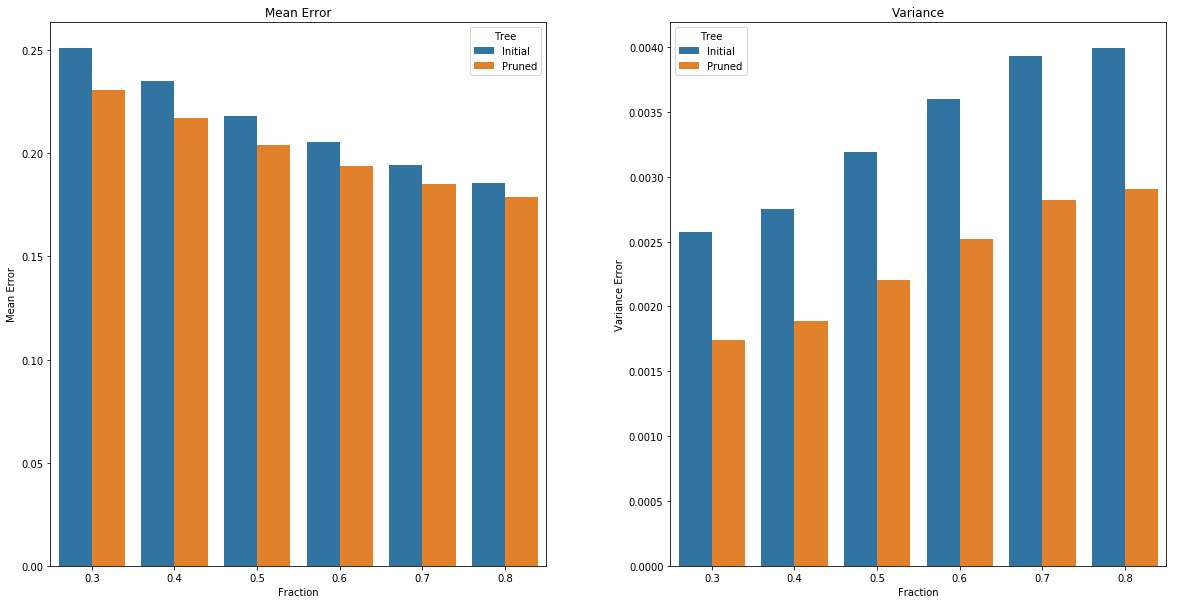

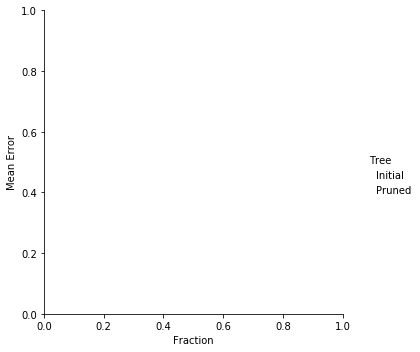

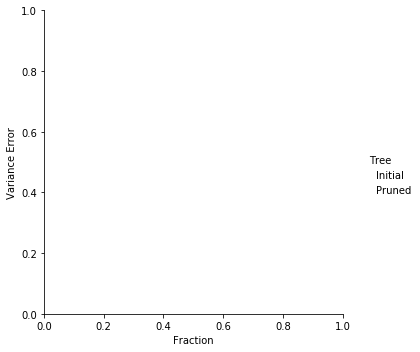

In [13]:
## Monk 1
import seaborn
fractions = [.3, .4, .5, .6, .7, .8]
print len(m.monk1)
assignment7(m.monk1, fractions)

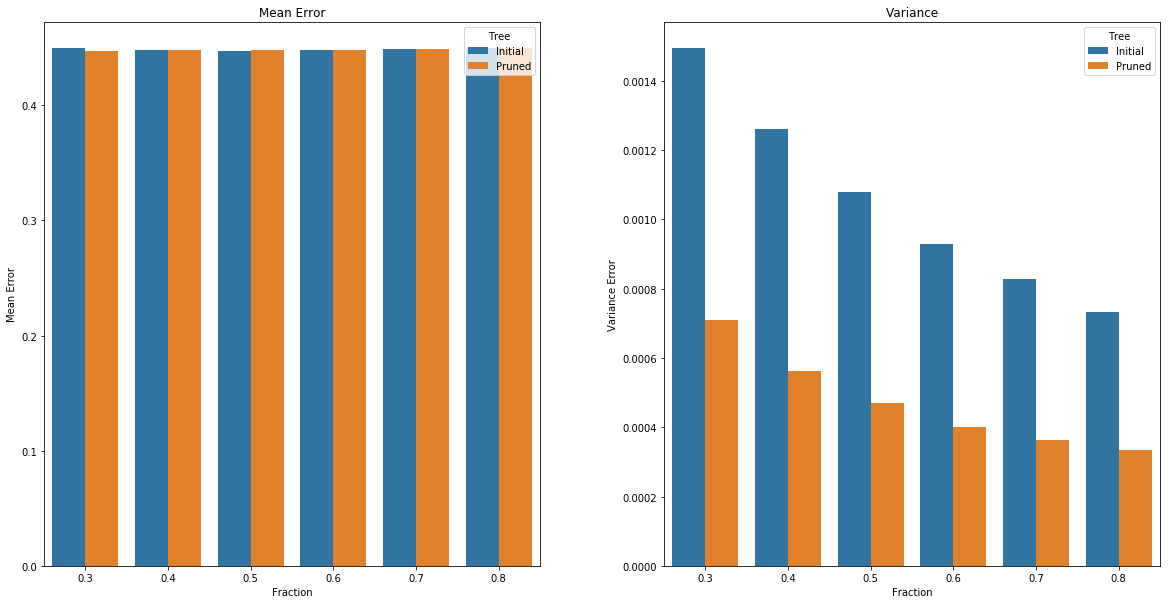

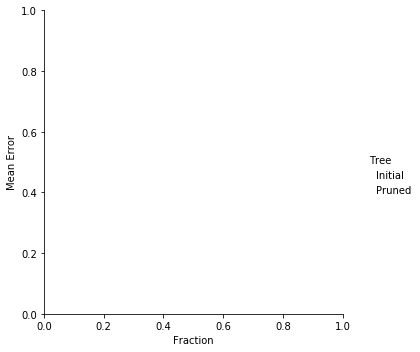

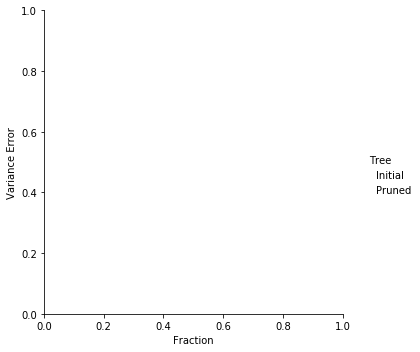

In [14]:
## Monk 3
fractions = [.3, .4, .5, .6, .7, .8]
assignment7(m.monk3, fractions)

In [15]:
import numpy as np
monk1 = m.monk1
errorInitial = []
errorPruned = []
meanErrorInitial = []
meanErrorPruned = []
varianceErrorInitial = []
varianceErrorPruned = []

fractions = [.3, .4, .5, .6, .7, .8]
for fraction in fractions:
    for i in range(0,250):
        monktrain, monkval = partition(monk1, fraction)
        initialTree = dtree.buildTree(monktrain, m.attributes)
        prunedTree = prune(initialTree, monkval)
        errorInitial.append(1-dtree.check(initialTree, m.monk1test))
        errorPruned.append(1-dtree.check(prunedTree, m.monk1test))
    
    print("Fraction : " + str(fraction))
    
    meanErrorInitial.append(np.mean(errorInitial))
    meanErrorPruned.append(np.mean(errorPruned))
    varianceErrorInitial.append(np.var(errorInitial))
    varianceErrorPruned.append(np.var(errorPruned))
    
    '''print("Mean Test Error on Initial Tree : " + str(np.mean(errorInitial)))
    print("Mean Test Error on Pruned Tree : " + str(np.mean(errorPruned)))
    print("Variance Test Error on Initial Tree : " + str(np.var(errorInitial)))
    print("Variance Test Error on Pruned Tree : " + str(np.var(errorPruned)))'''
    

Fraction : 0.3
Fraction : 0.4
Fraction : 0.5
Fraction : 0.6
Fraction : 0.7
Fraction : 0.8


In [16]:
monk3 = m.monk3
errorInitial = []
errorPruned = []
meanErrorInitial = []
meanErrorPruned = []
varianceErrorInitial = []
varianceErrorPruned = []

fractions = [.3, .4, .5, .6, .7, .8]
for fraction in fractions:
    for i in range(0,250):
        monktrain, monkval = partition(monk3, fraction)
        initialTree = dtree.buildTree(monktrain, m.attributes)
        prunedTree = prune(initialTree, monkval)
        errorInitial.append(1-dtree.check(initialTree, m.monk3test))
        errorPruned.append(1-dtree.check(prunedTree, m.monk3test))
    
    print("Fraction : " + str(fraction))
    
    meanErrorInitial.append(np.mean(errorInitial))
    meanErrorPruned.append(np.mean(errorPruned))
    varianceErrorInitial.append(np.var(errorInitial))
    varianceErrorPruned.append(np.var(errorPruned))
    
    '''print("Mean Test Error on Initial Tree : " + str(np.mean(errorInitial)))
    print("Mean Test Error on Pruned Tree : " + str(np.mean(errorPruned)))
    print("Variance Test Error on Initial Tree : " + str(np.var(errorInitial)))
    print("Variance Test Error on Pruned Tree : " + str(np.var(errorPruned)))'''
    

Fraction : 0.3
Fraction : 0.4
Fraction : 0.5
Fraction : 0.6
Fraction : 0.7
Fraction : 0.8


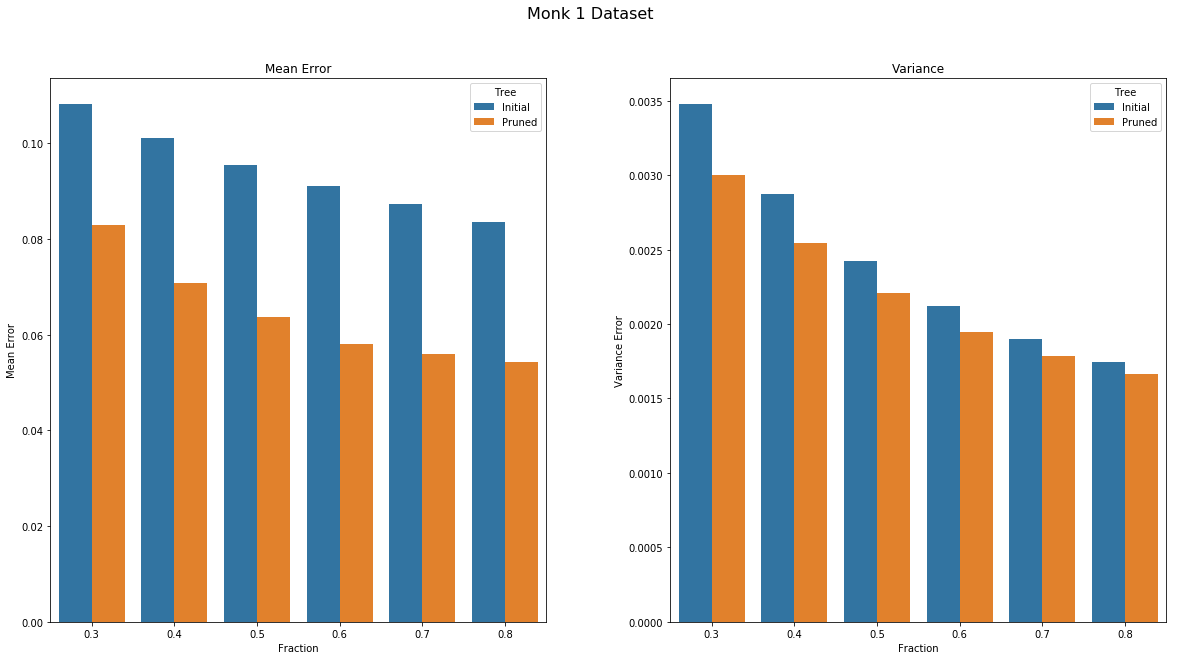

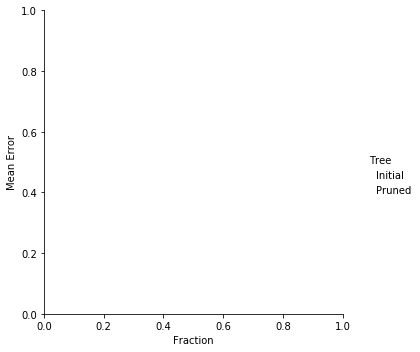

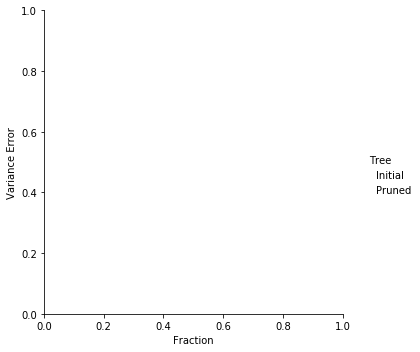

In [17]:
fig, ax =plt.subplots(1,2, figsize=(20,10))
fig.subplots_adjust(wspace=.25)
fig.suptitle('Monk 1 Dataset', fontsize=16)
ax[0].set_title('Mean Error')
ax[1].set_title('Variance')

df = pd.DataFrame(np.c_[meanErrorInitial,meanErrorPruned], index=fractions).reset_index()
df.columns = ['Fraction','Initial', 'Pruned']
df = pd.melt(df, id_vars="Fraction", var_name="Tree", value_name="Mean Error")
seaborn.factorplot(x='Fraction', y='Mean Error', hue='Tree', data=df, kind='bar', ax=ax[0])

df = pd.DataFrame(np.c_[varianceErrorInitial,varianceErrorPruned], index=fractions).reset_index()
df.columns = ['Fraction','Initial', 'Pruned']
df = pd.melt(df, id_vars="Fraction", var_name="Tree", value_name="Variance Error")
seaborn.factorplot(x='Fraction', y='Variance Error', hue='Tree', data=df, kind='bar', ax=ax[1])


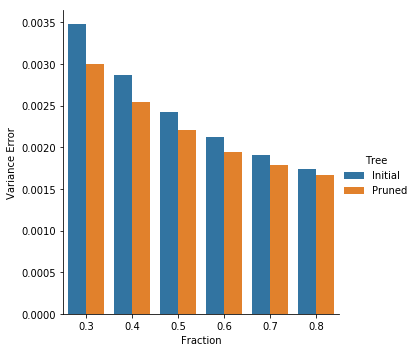

In [18]:
df = pd.DataFrame(np.c_[varianceErrorInitial,varianceErrorPruned], index=fractions).reset_index()
df.columns = ['Fraction','Initial', 'Pruned']
df = pd.melt(df, id_vars="Fraction", var_name="Tree", value_name="Variance Error")
seaborn.factorplot(x='Fraction', y='Variance Error', hue='Tree', data=df, kind='bar')

In [19]:
t = dtree.buildTree(m.monk1, m.attributes, 2)
dt5.drawTree(t)

SystemExit: 0

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
for x in monk1[0:10]:
    print (x.attribute)

In [ ]:
t=dtree.buildTree(m.monk1, m.attributes);
print(dtree.check(t, m.monk1test))

In [ ]:
newtree = dtree.buildTree(m.monk3, m.attributes, 2)

dt5.drawTree(newtree)

In [ ]:
print m.monk2